In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# CVS load
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [5]:
df.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [16]:
df.head(5)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
0,U001,5,80,3,10,120,20,2
1,U002,8,60,1,8,100,35,0
2,U003,3,90,0,6,90,5,2
3,U004,7,70,2,15,140,40,0
4,U005,2,50,5,3,60,8,0


In [18]:
df.tail()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
95,U096,8,86,6,14,98,22,1
96,U097,3,82,3,1,159,24,2
97,U098,1,91,1,9,92,34,2
98,U099,8,93,0,1,160,40,2
99,U100,3,73,3,16,82,29,2


In [6]:
df.isnull().sum()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

- There is no null so the data is not having null entries which means we do not have to deal with those case to fill null values with sum or mean values for the further data cleaning.

In [9]:
df.dtypes

User ID                                    object
Fan Challenges Completed                    int64
Predictive Accuracy (%)                     int64
Virtual Merchandise Purchases               int64
Sponsorship Interactions (Ad Clicks)        int64
Time on Live 360 (mins)                     int64
Real-Time Chat Activity (Messages Sent)     int64
dtype: object

C:\Users\prach\AppData\Local\Temp\ipykernel_10076\799062783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


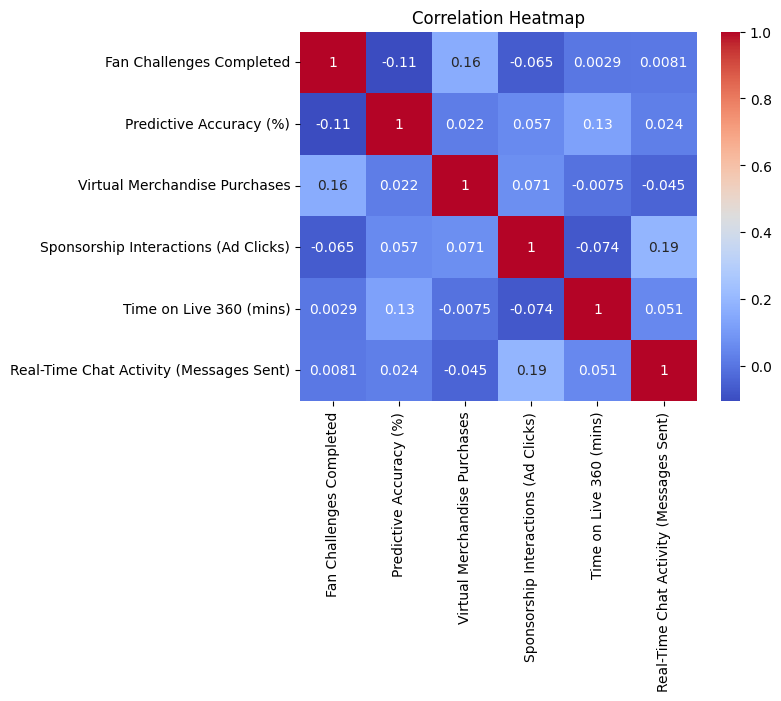

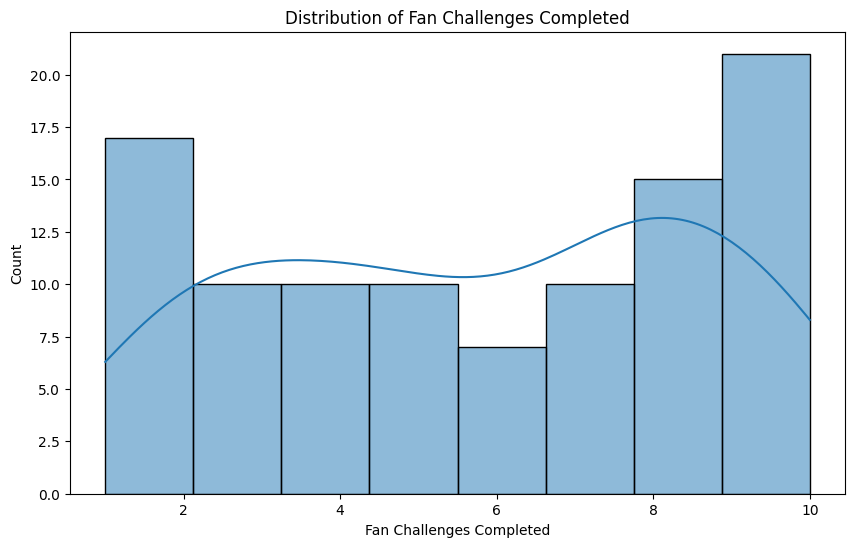

In [11]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of fan challenges completed
plt.figure(figsize=(10, 6))
sns.histplot(df['Fan Challenges Completed'], kde=True)
plt.title('Distribution of Fan Challenges Completed')
plt.show()


- The correlation heatmap shows a weak positive correlation (0.16) between Fan Challenges Completed and Virtual Merchandise Purchases. This suggests that users who complete more challenges are slightly more likely to make purchases, but the relationship is not strong,
- There's no clear linear relationship between Fan Challenges Completed and Virtual Merchandise Purchases, as seen in the scatter plot. Purchases range from 0 to 6 items across all levels of challenge completion.
- Predictive Accuracy has a very weak positive correlation (0.02) with Virtual Merchandise Purchases, indicating that a user's ability to predict race outcomes doesn't significantly influence their purchasing behavior.
- Sponsorship Interactions (Ad Clicks) have a weak positive correlation (0.07) with Virtual Merchandise Purchases. This suggests that users who interact more with ads might be slightly more inclined to make purchases, but the effect is minimal.
- Time spent on Live 360 coverage shows a very weak negative correlation (-0.01) with Virtual Merchandise Purchases. This could indicate that users who spend more time watching are slightly less likely to make purchases, possibly due to being more engaged with the viewing experience.
- Real-Time Chat Activity has a weak negative correlation (-0.04) with Virtual Merchandise Purchases, suggesting that highly active chatters might be slightly less likely to make purchases


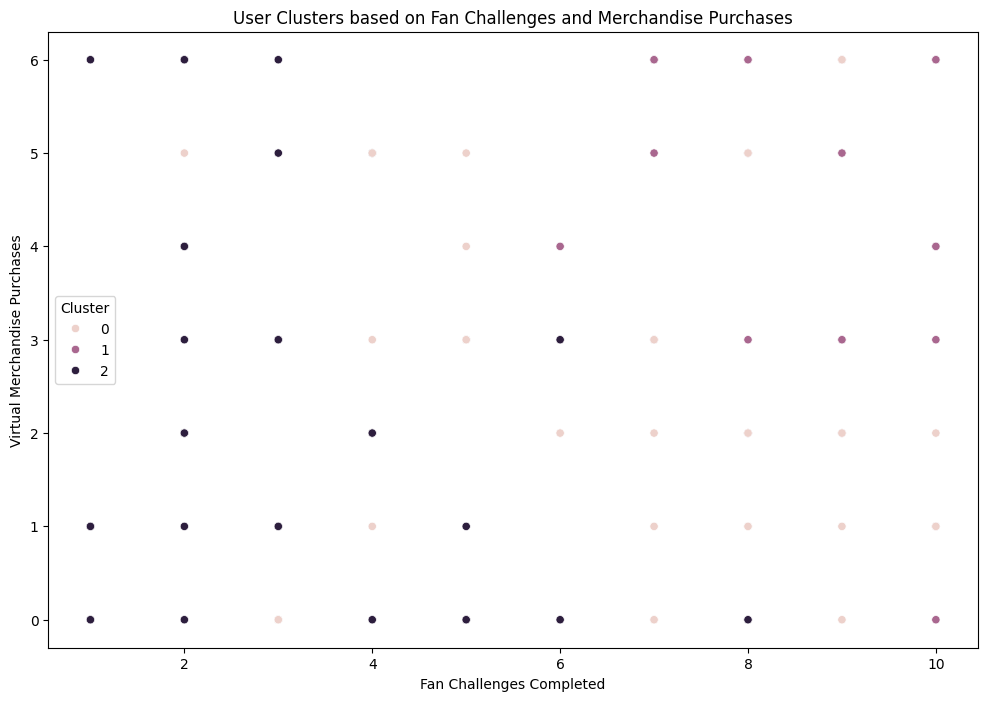

In [15]:
# Prepare data for clustering
# features = ['Fan Challenges Completed', 'Predictive Accuracy (/%)/', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (/Ad Clicks)/', 'Time on Live 360 (/mins)/']
features=['Fan Challenges Completed','Predictive Accuracy (%)','Virtual Merchandise Purchases','Sponsorship Interactions (Ad Clicks)','Time on Live 360 (mins)']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', data=df)
plt.title('User Clusters based on Fan Challenges and Merchandise Purchases')
plt.show()


- Cluster 2 (Largest group, 44 users): These users show moderate engagement across various activities.
- Cluster 0 (38 users): This group tends to complete more fan challenges and make more virtual merchandise purchases. They represent the most engaged and high-value users.
- Cluster 1 (Smallest group, 18 users): These users generally show lower engagement in challenges and purchases. They might be casual or new users.

### Final Outcome
- Engagement vs. Purchases: While there's a slight positive relationship between fan challenges completed and merchandise purchases, it's not strong enough to be the sole predictor of purchasing behavior.
- Time Spent vs. Purchases: Interestingly, spending more time on Live 360 coverage doesn't necessarily translate to more purchases. This could indicate an opportunity to better integrate purchasing options within the viewing experience.
- Ad Interaction: The weak positive correlation between sponsorship interactions and purchases suggests that current ad strategies have limited effectiveness in driving sales.
- User Segmentation: The clustering analysis reveals distinct user groups with varying levels of engagement and purchasing behavior. This segmentation can be valuable for targeted marketing and personalized user experiences.
- Predictive Accuracy: A user's ability to predict race outcomes doesn't significantly influence their purchasing behavior, suggesting that other factors are more important in driving sales.